# **TTI109 - Estatística**
# **Aula 02 - Estatística Descritiva 01**

Nessa aula vamos aprender a construir:

* Classes para descrever uma distribuição de dados;
* Tabelas de frequências;
* Histogramas;
* Polígonos de frequências.

## **Construindo uma distribuição de frequência com base em um conjunto de dados**

O conjunto de dados a seguir lista os preços (em dólares) de 30 aparelhos
GPS (global positioning system) portáteis.
Construa uma distribuição de frequência com sete classes.

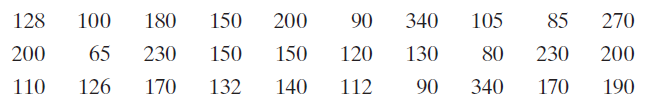

In [28]:
import pandas as pd
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])
print(data)

0     128
1     100
2     180
3     150
4     200
5      90
6     340
7     105
8      85
9     270
10    200
11     65
12    230
13    150
14    150
15    120
16    130
17     80
18    230
19    200
20    110
21    126
22    170
23    132
24    140
25    112
26     90
27    340
28    170
29    190
dtype: int64


In [29]:
# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7
print(f'Valor mínimo da distribuição = {v_min}')
print(f'Valor máximo da distribuição = {v_max}')

Valor mínimo da distribuição = 65
Valor máximo da distribuição = 340


## **Distribuição de Frequências**

O método `value_counts` registra a frequência de ocorrência dos dados em cada classe (o número de classes é dado pelo parâmetro `bins`). O método `sort_index` ordena os índices (classes) em ordem crescente.

In [30]:
dist_freq = data.value_counts(bins=7).sort_index()
print(dist_freq)

(64.72399999999999, 104.286]    6
(104.286, 143.571]              9
(143.571, 182.857]              6
(182.857, 222.143]              4
(222.143, 261.429]              2
(261.429, 300.714]              1
(300.714, 340.0]                2
Name: count, dtype: int64


Note que as classes da distribuição de frequências não estão definidas de forma "amigável". Vamos alterar a definição dos intervalos de classe usando o método `interval_range`.

In [31]:
# Reconfiguração do conjunto de dados: Pandas Series para Pandas DataFrame
nova_dist_freq = pd.DataFrame(dist_freq)
display(nova_dist_freq)

,count
"(64.72399999999999, 104.286]",6
"(104.286, 143.571]",9
"(143.571, 182.857]",6
"(182.857, 222.143]",4
"(222.143, 261.429]",2
"(261.429, 300.714]",1
"(300.714, 340.0]",2


In [32]:
# Resetando os índices do DataFrame
nova_dist_freq = nova_dist_freq.reset_index()
display(nova_dist_freq)

,index,count
0,"(64.72399999999999, 104.286]",6
1,"(104.286, 143.571]",9
2,"(143.571, 182.857]",6
3,"(182.857, 222.143]",4
4,"(222.143, 261.429]",2
5,"(261.429, 300.714]",1
6,"(300.714, 340.0]",2


In [33]:
# Renomeando as colunas do DataFrame

display(nova_dist_freq)

,index,count
0,"(64.72399999999999, 104.286]",6
1,"(104.286, 143.571]",9
2,"(143.571, 182.857]",6
3,"(182.857, 222.143]",4
4,"(222.143, 261.429]",2
5,"(261.429, 300.714]",1
6,"(300.714, 340.0]",2


In [34]:
# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = round((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start=v_min, end=v_max, freq=amplitude)
print(intervalos)

IntervalIndex([(65, 104], (104, 143], (143, 182], (182, 221], (221, 260], (260, 299], (299, 338]], dtype='interval[int64, right]')


In [35]:
# Atribuição dos intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
display(nova_dist_freq)

,index,count,Classe
0,"(64.72399999999999, 104.286]",6,"(65, 104]"
1,"(104.286, 143.571]",9,"(104, 143]"
2,"(143.571, 182.857]",6,"(143, 182]"
3,"(182.857, 222.143]",4,"(182, 221]"
4,"(222.143, 261.429]",2,"(221, 260]"
5,"(261.429, 300.714]",1,"(260, 299]"
6,"(300.714, 340.0]",2,"(299, 338]"


## **Caracterísiticas adicionais da distribuição**

Vamos adicionar as colunas que exibem os pontos médios, a frequência relativa e a frequência acumnulada de cada classe da distribuição.

In [36]:
# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos]
print(pts_medios)

[84.5, 123.5, 162.5, 201.5, 240.5, 279.5, 318.5]


In [37]:
# Inserção da coluna Pontos médios
nova_dist_freq['Pontos médios'] = pts_medios
display(nova_dist_freq)

,index,count,Classe,Pontos médios
0,"(64.72399999999999, 104.286]",6,"(65, 104]",84.5
1,"(104.286, 143.571]",9,"(104, 143]",123.5
2,"(143.571, 182.857]",6,"(143, 182]",162.5
3,"(182.857, 222.143]",4,"(182, 221]",201.5
4,"(222.143, 261.429]",2,"(221, 260]",240.5
5,"(261.429, 300.714]",1,"(260, 299]",279.5
6,"(300.714, 340.0]",2,"(299, 338]",318.5


In [41]:
# Certifique-se de ter um DataFrame chamado 'data' com seus dados
observacoes = len(data)  # Certifique-se de que 'data' seja um DataFrame com seus dados

# Certifique-se de que as colunas em 'nova_dist_freq' estejam corretamente renomeadas
nova_dist_freq['Frequência relativa'] = nova_dist_freq['Frequencia'] / observacoes  # Ou 'Frequência' dependendo da renomeação
nova_dist_freq['Frequência acumulada'] = nova_dist_freq['Frequencia'].cumsum()  # Ou 'Frequência' dependendo da renomeação

# Exiba o DataFrame com as colunas adicionadas
display(nova_dist_freq)


KeyError: 'Frequencia'

## **Construção do histograma de frequências**

O histograma é construído usando o método `hist` do `Pandas`. Diversas características do histograma, tais como as classes (parâmetro `bins`), cor das barras e marcações nos eixos vertical e horizontal são programáveis.

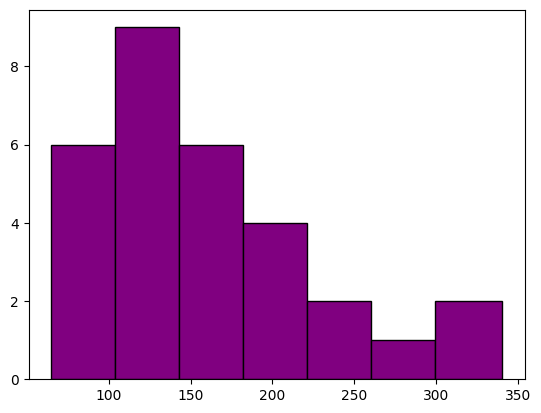

In [42]:
import matplotlib.pyplot as plt

# Construção do histograma
histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max],
                       color='purple', edgecolor='black', grid=False)
# Inserção de atributos ao gráfico


Vamos agora inserir a frequência observada no topo de cada barra. Embora opcional, essa é uma representação que facilita a visualização das frequências relativas. Apenas para diferenciar da representação anterior, vamos usar a cor verde para as barras.

TypeError: 'Axes' object is not subscriptable

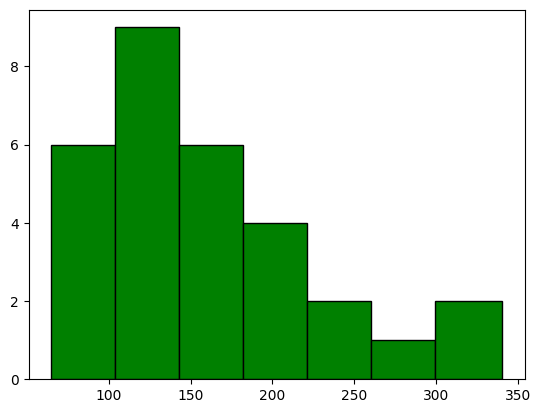

In [46]:
# Construção do histograma
histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max],
                       color='green', edgecolor='black', grid=False)
# Inserção de atributos ao gráfico
histograma.set(xlabel='Preço [US$]',
               ylabel='Frequência - Número de navegadores GPS',
               title='Distribuição de frequências dos preços de GPS',
               xticks=nova_dist_freq['Pontos médios'],
               yticks=range(0,nova_dist_freq['Frequência'].max()+2,2))
# Inserção de rótulos nas barras do histograma


## **Construção do polígono de frequências**

Para construir o polígono de frequências, vamos empregar comandos próprios da biblioteca `matplotlib.pyplot`.

In [44]:
# Cálculo dos pontos médios fictícios
fic_esq =
print(f'Ponto médio fictício à esquerda = {fic_esq[0]}')
fic_dir =
print(f'Ponto médio fictício à direita = {fic_dir[0]}')

SyntaxError: invalid syntax (216010831.py, line 2)

In [ ]:
# Construção dos dados com inserção dos pontos médios fictícios
x_data =
print(f'Valores para eixo x: {x_data}')
y_data =
print(f'Valores para eixo y: {y_data}')

In [ ]:
# Plotagem do polígono de frequências, com diversos atributos


In [ ]:
# Plotagem do polígono de frequências com frequências relativas

plt.xlabel('Preço [US$]')
plt.ylabel('Frequência relativa')
plt.title('Distribuição de frequências dos preços de GPS')
plt.xticks(x_data)
plt.grid()